In [10]:
import pandas as pd
data=pd.read_csv("C://Users//KIIT//Desktop//mul_predictive_analysis.csv")
data

,price,sqft_living,bedrooms,bathrooms,flooors
0,221900.0,1180,3,1.00,2.0
1,538000.0,2570,3,2.25,1.0
2,180000.0,770,2,1.00,1.0
3,604000.0,1960,4,3.00,1.0
4,510000.0,1680,3,2.00,1.0
...,...,...,...,...,...
567,671500.0,2160,5,2.75,1.5
568,610000.0,1180,3,1.00,1.0
569,405000.0,1160,2,0.75,2.0
570,338900.0,1830,4,2.50,2.0


In [11]:
y=data.price
x=data[['sqft_living','bedrooms','bathrooms','flooors']]
data.shape

(572, 5)

In [12]:
data.corr()# only in two variable 

,price,sqft_living,bedrooms,bathrooms,flooors
price,1.000000,0.718698,0.342519,0.517148,0.046091
sqft_living,0.718698,1.000000,0.580489,0.750811,0.065390
bedrooms,0.342519,0.580489,1.000000,0.503037,-0.021199
bathrooms,0.517148,0.750811,0.503037,1.000000,0.072259
flooors,0.046091,0.065390,-0.021199,0.072259,1.000000


In [13]:
new_feature=data[['sqft_living','bedrooms','bathrooms']]
new_feature.describe()

,sqft_living,bedrooms,bathrooms
count,572.000000,572.000000,572.000000
mean,2115.681818,3.372378,2.077797
std,944.972810,0.865452,0.748949
min,430.000000,1.000000,0.750000
25%,1427.500000,3.000000,1.500000
50%,1970.000000,3.000000,2.250000
75%,2550.000000,4.000000,2.500000
max,6070.000000,7.000000,5.000000


In [15]:
#ols=ordinary least square
#p=level of significant
x1=new_feature
import statsmodels.api as sm
x2=sm.add_constant(x1)
model=sm.OLS(y,x2).fit()#fit-final values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     209.6
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           1.60e-91
Time:                        16:31:43   Log-Likelihood:                -7921.9
No. Observations:                 572   AIC:                         1.585e+04
Df Residuals:                     568   BIC:                         1.587e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.653e+04   4.43e+04      1.500      0.134   -2.06e+04    1.54e+05
sqft_living   311.0385     18.020     17.261      0.000     275.645     346.432
bedrooms    -4.586e+04    1.5e+04     -3.050      0.002   -7.54e+04   -1.63e+04
bathrooms   -1.684e+04   2.14e+04     -0.786      0.432   -5.89e+04    2.52e+04
==============================================================================
Omnibus:                      330.333   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3957.229
Skew:                           2.312   Prob(JB):                         0.00
Kurtosis:                      15.027   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
from scipy.stats import pearsonr
stats,ps=pearsonr(data.sqft_living,data.bedrooms)
stats,ps
#correlations hai bs dusra tarika hai ye first value correlation wali hai and second p value hai (level of significan)

(0.5804885508091232, 7.871566618822501e-53)

In [13]:
stats,ps=pearsonr(data.sqft_living,data.bathrooms)
stats,ps

(0.7508110081780366, 9.585406141558372e-105)

In [20]:
df1=pd.DataFrame({'sqft_living':[3500,3000,4000],
                  'bedrooms':[6,7,8],'bathrooms':[3.5,4,5]})
df1=sm.add_constant(df1)
df1

,const,sqft_living,bedrooms,bathrooms
0,1.0,3500,6,3.5
1,1.0,3000,7,4.0
2,1.0,4000,8,5.0


In [21]:
model.predict(df1)

0    821075.547238
1    611278.381814
2    859620.166026
dtype: float64

<Axes: >

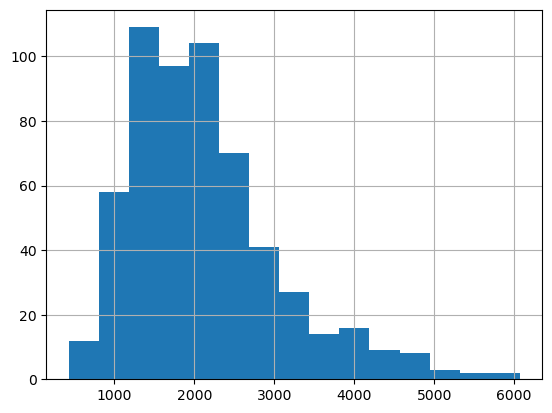

In [18]:
data.sqft_living.hist(bins=15)


<Axes: >

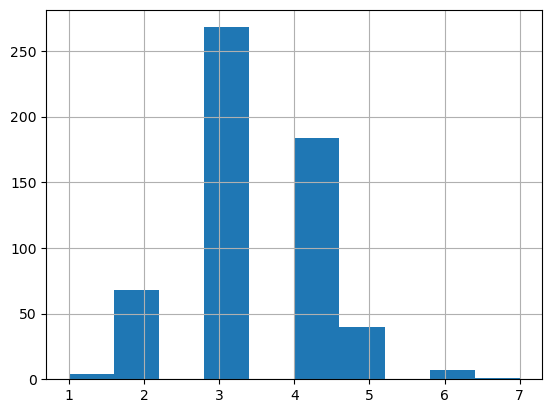

In [23]:
data.bedrooms.hist(bins=10)


<Axes: >

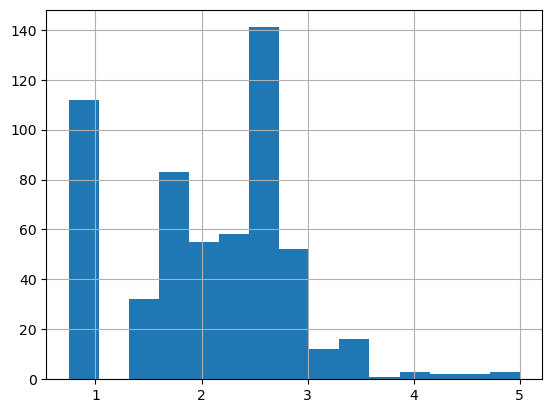

In [26]:
data.bathrooms.hist(bins=15)


<Axes: >

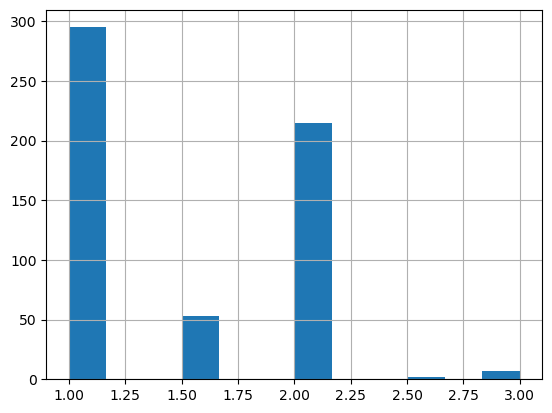

In [32]:
data.flooors.hist(bins=12)


In [34]:
stats,p=pearsonr(data.price,data.flooors)
stats,p


(0.046091108180282184, 0.271108876231629)